# Part I - (Prosper Loan Data Exploration)
## by (Olatunji Titobiloluwa)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in dataset
prosper_loan= pd.read_csv('prosperLoanData.csv')
prosper_loan.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
print(prosper_loan.shape)
print(prosper_loan.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


### What is the structure of your dataset?

 There are 113,937 loans with 81 variables on each loan including loan original amount, borrower rate (or interest rate), Employment status, Stated Monthly income, and many others. Most variables are numeric in nature, others are either stored as object (i.e. text) or as bool. But the variables ProsperRating, ProsperScore are ordered variables with the following levels.

(WORST TO BEST)
- ProsperRating (Alpha): HR,E,D,C,B,A,AA
- ProsperScore: 1,2,3,4,5,6,7,8,9,10

We could also consider Employment Status as an ordered variable with the following levels
- EmploymentStatus : Employed, Self-employed, Full-time, Part-time, Retired, Other, Not employed, Not available.

### What is/are the main feature(s) of interest in your dataset?

> I'm highly interested in features that are likely to predict a borrower's interest rate for a loan(BorrowerRate).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I personally expect that the higher the LoanOriginalAmount, the higher the interest rate should be. Other features like StatedMonthlyIncome, EmploymentStatus, Term, ProsperRating (Alpha) are likely to have effect on a borrower's interest rate. 

In [4]:
# Subset dataframe by selecting features of interest
cols= ['LoanOriginalAmount', 'StatedMonthlyIncome','EmploymentStatus','Term', 
       'ProsperRating (Alpha)', 'BorrowerRate']
loan= prosper_loan[cols]

In [5]:
loan.head()

,LoanOriginalAmount,StatedMonthlyIncome,EmploymentStatus,Term,ProsperRating (Alpha),BorrowerRate
0,9425,3083.333333,Self-employed,36,NaN,0.1580
1,10000,6125.000000,Employed,36,A,0.0920
2,3001,2083.333333,Not available,36,NaN,0.2750
3,10000,2875.000000,Employed,36,A,0.0974
4,15000,9583.333333,Employed,36,D,0.2085


In [6]:
# loan records with missing values
loan.isna().sum()

LoanOriginalAmount           0
StatedMonthlyIncome          0
EmploymentStatus          2255
Term                         0
ProsperRating (Alpha)    29084
BorrowerRate                 0
dtype: int64

In [7]:
# remove loan with missing values
loan.dropna(inplace= True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# to check if missing records have been dropped
loan.isna().sum()

LoanOriginalAmount       0
StatedMonthlyIncome      0
EmploymentStatus         0
Term                     0
ProsperRating (Alpha)    0
BorrowerRate             0
dtype: int64

In [9]:
# descriptive statistics for numeric variables
loan.describe()

,LoanOriginalAmount,StatedMonthlyIncome,Term,BorrowerRate
count,84853.000000,8.485300e+04,84853.000000,84853.000000
mean,9083.440515,5.931175e+03,42.486135,0.196022
std,6287.860058,8.239944e+03,11.640346,0.074631
min,1000.000000,0.000000e+00,12.000000,0.040000
25%,4000.000000,3.434000e+03,36.000000,0.135900
50%,7500.000000,5.000000e+03,36.000000,0.187500
75%,13500.000000,7.083333e+03,60.000000,0.257400
max,35000.000000,1.750003e+06,60.000000,0.360000


After removing missing loan records (which a wrangling procedure), we have a total of 84,853 loans to work with for this exploration project.

## Univariate Exploration

**I'll start with the main variable of interest: BorrowerRate.**

Since BorrowerRate is a quantitative variable, I will be making use of a histogram.

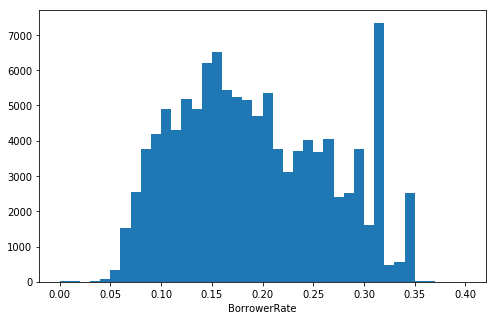

In [10]:
bins = np.arange(0, loan.BorrowerRate.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_loan, x = 'BorrowerRate', bins = bins);
plt.xlabel('BorrowerRate');

This distribution looks roughly multimodal with a  small peak at 0.1 and a large peak a little after 0.15. We also have another small peak at 0.20 then another at almost 0.30. Additionally, we have a very sharp peak at approximately 0.32 and then another slight jump right before 0.35. 

We have a few loans with an interest rate greater than 0.32. Let's check that out.

In [11]:
# check for loans with interest rate greater than 0.32
loan[loan.BorrowerRate> 0.32]

,LoanOriginalAmount,StatedMonthlyIncome,EmploymentStatus,Term,ProsperRating (Alpha),BorrowerRate
91,3500,2250.000000,Employed,36,E,0.3220
242,7500,4504.166667,Employed,36,E,0.3220
269,2500,3958.333333,Full-time,36,HR,0.3495
305,1500,2916.666667,Employed,36,E,0.3435
354,2500,4166.666667,Self-employed,36,HR,0.3400
406,8000,8083.333333,Full-time,36,D,0.3250
407,4000,7083.333333,Employed,60,E,0.3304
415,7500,4333.333333,Employed,36,E,0.3435
425,2500,2750.000000,Full-time,36,C,0.3400
527,1500,5916.666667,Employed,36,HR,0.3269


From the above, most borrowers with interest rate higher than 0.32 are employed and they also have low Prosper Ratings. Also, the terms of their loans are either 36months or higher.

**Next, let's take a look at our main predictor variables:LoanOriginalAmount**

This is also a quantitative variable so a histogram it is.

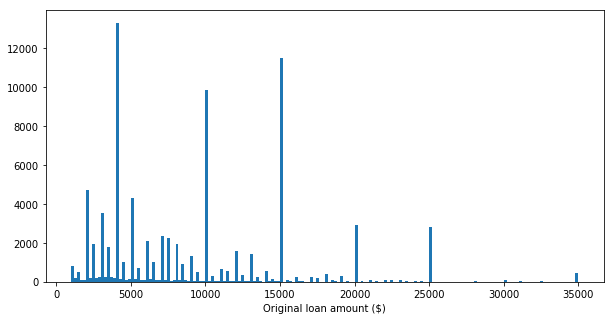

In [12]:
bins = np.arange(1000, loan.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[10, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

There are very large spikes which occur at almost 5,000, 10,000 and 15,000. We also have some spikes on 20,000, 25,000. Then a smaller spike at 35,000. This shows that most loans are in multiples of a thousand (1k).

**Now, let's take a look at another predictor variable: StatedMonthlyIncome**

This is also a quantitative variable, so we plot a histogram.

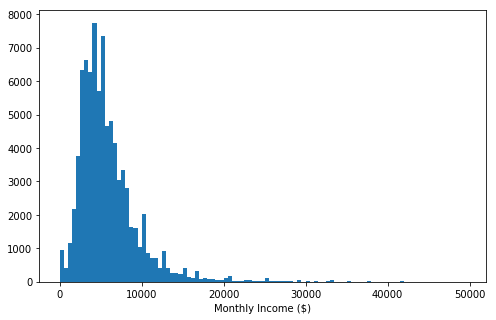

In [13]:
plt.figure(figsize=[8,5])
bins= np.arange(0, 50000, 500 )
plt.hist(data= loan, x= 'StatedMonthlyIncome', bins= bins)
plt.xlabel('Monthly Income ($)');

This distribution of Stated Monthly Income is highly skewed to the right. It also shows that most of the stated monthly income is less than 30,000. 

Let's check out the stated monthly income that are greater than 30k.

In [14]:
# checking monthly income greater than 30k
(loan.StatedMonthlyIncome>30000).sum()

249

In [15]:
# get percentage of monthly income greater than 30k
(loan.StatedMonthlyIncome>30000).sum()/float(loan.shape[0])

0.0029344867005291504

Less than 0.3% borrowers have stated monthly income greater than 30k. It is a minor amount compared to the rest of the dataset so these could be regarded as outliers for this analysis and it is better if it is removed.

In [16]:
# remove records of stated monthly income greater than 30k which we regard as outliers
loan= loan[loan.StatedMonthlyIncome<=30000]

In [17]:
# to check if these records have been successfully removed
(loan.StatedMonthlyIncome>30000).sum()

0

**Let us take a look at other features of interest: Term, EmploymentStatus, ProsperRating**

Before we make any plots, let's first convert them to ordered categorical variables.

In [18]:
# convert ProsperRating to ordered categorical variables
rating_order= ['HR','E','D','C','B','A','AA']
ordered_var= pd.api.types.CategoricalDtype(ordered= True, categories= rating_order)
loan['ProsperRating (Alpha)']= loan['ProsperRating (Alpha)'].astype(ordered_var)

# convert EmploymentStatus to ordered categorical variables
employ_order= ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed','Not available']
ordered_var= pd.api.types.CategoricalDtype(ordered= True, categories= employ_order)
loan['EmploymentStatus']= loan['EmploymentStatus'].astype(ordered_var)

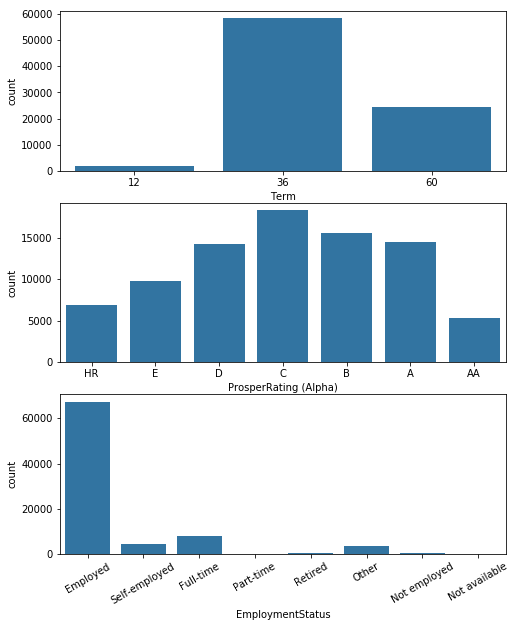

In [19]:
# distribution plot
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
plot_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'Term', color = plot_color, ax = ax[0])
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', color = plot_color, ax = ax[1])
sb.countplot(data = loan, x = 'EmploymentStatus', color = plot_color, ax = ax[2]);
plt.xticks(rotation=30);

The distribution plot above shows us 3 diifferent things. They include:
- The length of most of the loans is 36 months.
- Most of the borrower's Prosper ratings is between D and A.
- Majority of the borrowers are employed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the BorrowerRate looks multimodal. Most of the values fell in between 0.05 and 0.35. There are no unusual points so I did not need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The distribution of the Stated Monthly Income is highly skewed to the right. Also, most of the stated monthly income are less than 30,000(30k). There are very few borrowers with monthly income greater than 30k with a percentage of 0.3 which we regarded as outliers and therefore removed them.

There is no need to perform any transformations.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

To start off with, I want to take a look at the pairwise correlations between the features of interest in this dataset. 

In [20]:
numeric_vars= ['LoanOriginalAmount','StatedMonthlyIncome','BorrowerRate']
categorical_vars= ['Term','ProsperRating (Alpha)','EmploymentStatus']

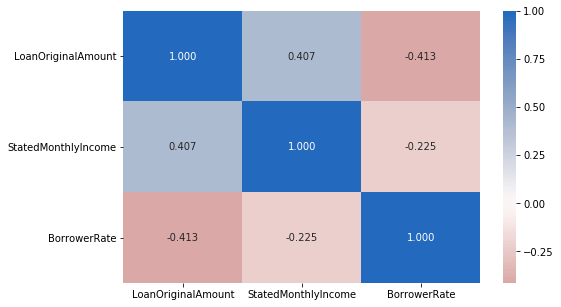

In [21]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

loan.shape= (84604, 6)
loan_samp.shape= (5000, 6)


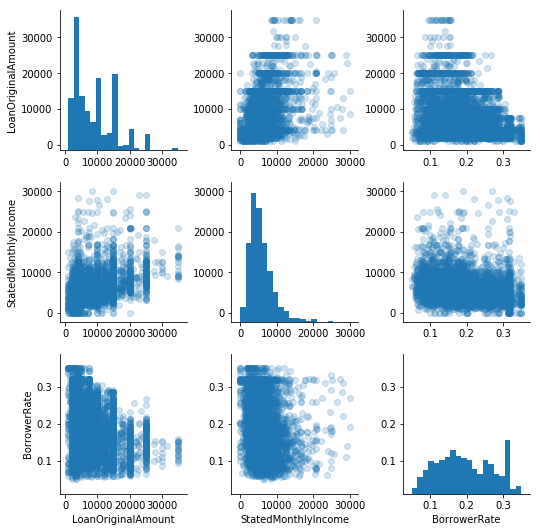

In [22]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
print("loan.shape=",loan.shape)
loan_samp = loan.sample(5000)
print("loan_samp.shape=",loan_samp.shape)
g = sb.PairGrid(data = loan_samp.dropna(), vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha= 0.2);

The correlation coefficient of BorrowerRate and and LoanOriginalAmount is -0.413. The scatter plot also shows that there is a negative correlation between BorrowerRate and LoanOriginalAmount which disagrees with my hypothesis: the higher the loan amount, the higher the interest rate. Instead, the plot shows that the higher the loan amount, the lower the interest rate. The plot also shows that there is a positive correlation between StatedMonthlyIncome and LoanOriginalAmount which makes sense because borrower's with higher income get to loan high amount of money.

**Let's check out the correlation between the numeric variables and the categorical variables.**

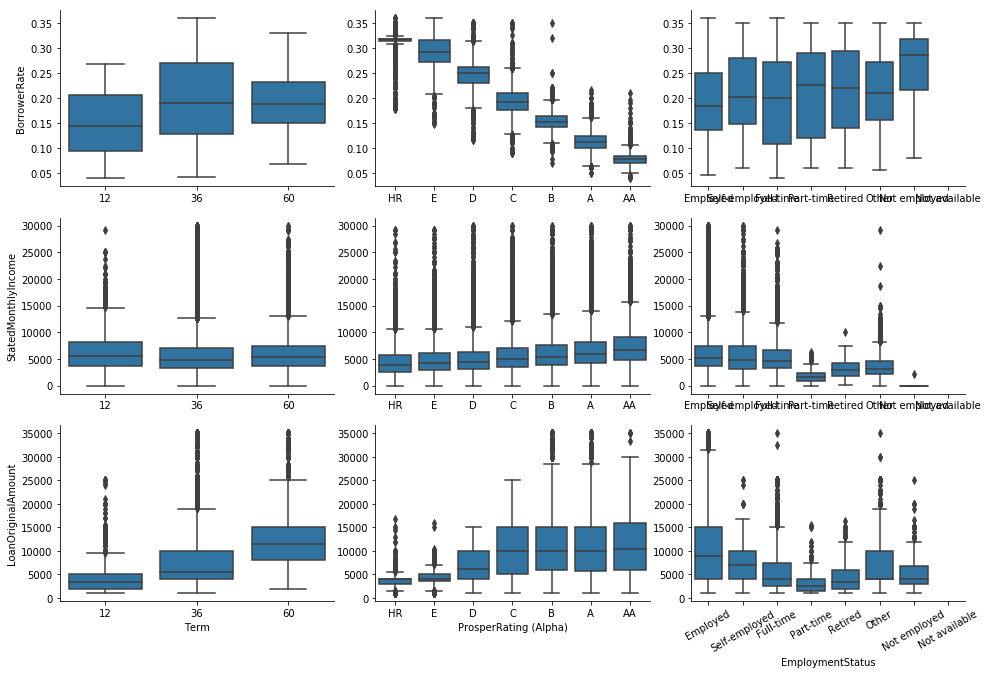

In [23]:
# plot matrix 
def boxgrid(x, y, **kwargs):
    # Quick hack for creating box plots with seaborn's PairGrid.
    plot_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = plot_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = ['BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = categorical_vars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The figure above shows us variety of observations. They include the following:
- The loan amount increases as the loan term increases.
- The BorrowerRate decreases with better ratings. Borrowers with the best ratings have the lowest interest rate. This shows that Prosper Ratings has a strong effect on a borrower's interest rate.
- The Loan Amount increases with better ratings. 
- Borrowers with high stated monthly income also have good prosper ratings.
- Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

**Finally, let's take a look at relationship between the three categorical variables.**

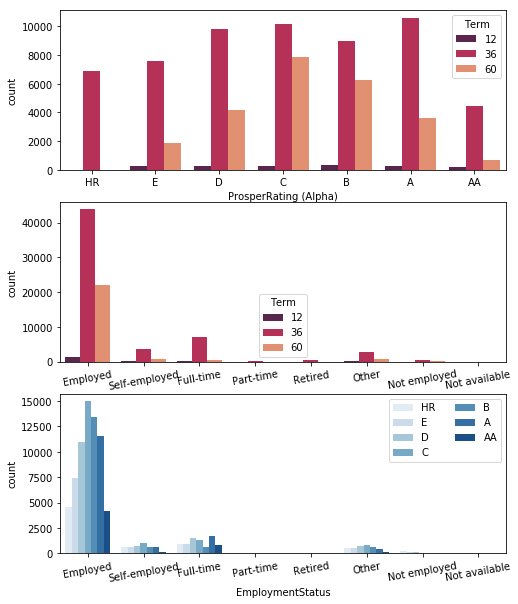

In [24]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper Rating vs Term
plt.subplot(3, 1, 1)
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'rocket')

# subplot 2: Employment status vs Term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan, x = 'EmploymentStatus', hue = 'Term', palette = 'rocket')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

From the plot above, it visible that all levels have ratings have loan terms of 36months. Ratings of D,C,B,A have loan terms of 60months. There are not much data available to show the interaction of Part-time, Retired and Not employed with the loan terms. Same applies to the plot of Ratings against EmploymentStatus. Majority of the borrowers that are employed are on loan terms of 36months, lesser borrowers on terms of 60months.   

**Let's take a look at the relationship between our main predictor variable (LoanOriginalAmount) and our main variable of interest (BorrowerRate)**

Both of the variables above are quantitative variable, therefore a scatterplot would be the best suitable plot to show their relationship.

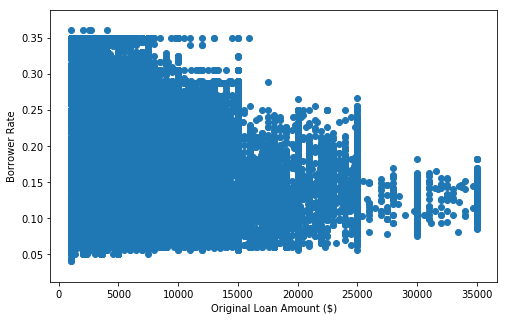

In [25]:
plt.figure(figsize=[8,5])
plt.scatter(data= loan, x= 'LoanOriginalAmount', y= 'BorrowerRate')
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Borrower Rate');

The strength of the relationship is fairly unclear due to overplotting, so I will make use of transparency with the use of the *alpha* parameter using the *regplot() function.*

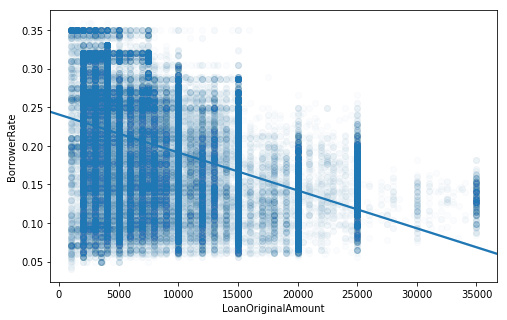

In [26]:
plt.figure(figsize=[8,5])
sb.regplot(data= loan, x= 'LoanOriginalAmount', y= 'BorrowerRate', scatter_kws= {'alpha':0.02});

The plot shows a negative correlation between BorrowerRate and LoanOriginalAmount with a fitted regression line. It is visible that the more loan amounts, the lesser the interest rates. There are a lot of plotted data points between amounts of 5000 and 15,000.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a negative correlation between the Borrower Rate and the Loan Amount, which means the more loan amounts, the less the rates. Prosper Ratings has a strong effect on a borrower's interest rate. The BorrowerRate decreases with better ratings. Borrowers with the best ratings have the lowest interest rate. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a positive correlation between Stated Monthly Income and Loan Amount as well as ProsperRatings. Borrowers with higher stated monthly income have better ratings and more loans than borrowers with lesser monthly income. Also, most borrowers that are employed, full-time or self employed tend to have more income than retired, part time, not available and not employed borrowers. 

## Multivariate Exploration

**Here, the main thing I want to explore is the effect of two of the categorical variables (Term, Prosper Ratings) on BorrowerRate and LoanOriginalAmount.**

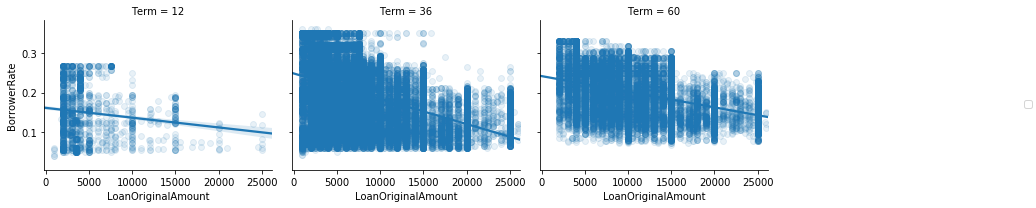

In [27]:
# Effect of Term on Loan Amount and Borrower Rate 
g=sb.FacetGrid(data=loan, aspect=1.2, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

From the above, it shows that loan terms doesn't affect either Loan Amount or Borrower Rate. It is negatively correlated.

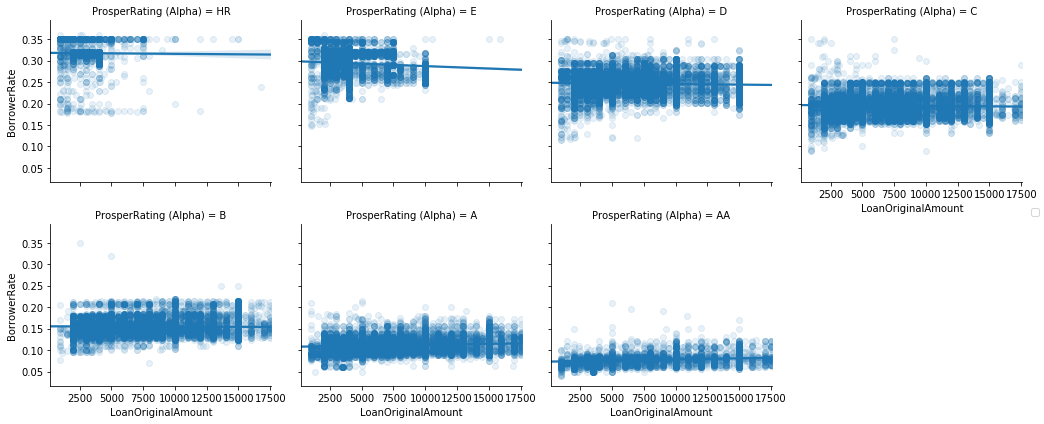

In [28]:
# Effect of Prosper Ratings on Loan Amount and Borrower Rate
g=sb.FacetGrid(data=loan, aspect=1.2, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

From the plot above, it appears that as the ratings range from worst to best, there's a slight shift from negative correlation to a bit of a positive correlation. With this we can say that, borrowers realised that they get better ratings as they loan more money so borrowers that loan less before tend to increase their loan amounts so they can get better Prosper Ratings. This is pretty interesting.

**Also, let's explore the effect of term and ratings on Stated Monthly Income.**

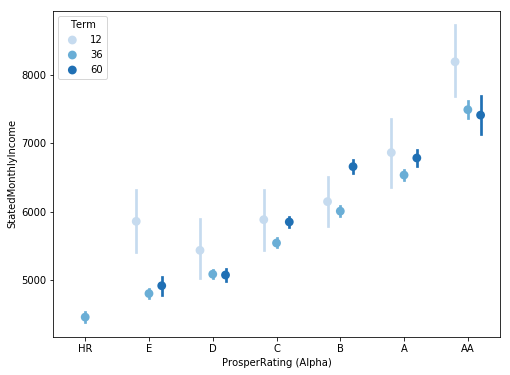

In [29]:
plt.figure(figsize=[8,6])
sb.pointplot(data = loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4);

It shows above that there's really no effect of term and ratings on StatedMonthlyIncome.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Term and Rating didn't really have any effect on Stated Monthly income. Also, Terms did not have any effect on Loan Amount and BorrowerRate. But when it comes to Ratings against Loan Amount and Borrower rate, it appears that as the ratings range from worst to best, there's a slight shift from negative correlation to a bit of a positive correlation.

### Were there any interesting or surprising interactions between features?

> A surprising and interesting interaction is that the BorrowerRate and OriginalLoanAmount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is shifted over to be positive when the ratings are A and AA.

## Conclusions
> During the course of exploration for this project, I performed a Preliminary Wrangling by choosing and focusing on my features of interest and then performed a bit of cleaning by dropping missing loan records of the variables of interest. Also, I removed some outliers which were not needed for this analysis.

> The main purpose of this exploration was to identify features that are likely to have effect on BorrowerRate. After series of visualizations ranging from univariate-bivariate-multivariate visualizations, I realized that Stated Monthly Income, Employment Status and Prosper Ratings have major effect on a Borrower's interest rate on a loan.